In [1]:
import numpy as np
from numpy import sqrt, cos, sin
import matplotlib
import matplotlib.pyplot as plt

# Nonlinearities in solid mechanics 


As discussed in the video, there are three main types of nonlinearities in solid mechanics. We will focus on two of them in this course: 

* Geometric nonlinearities 
    * Large displacements (even when the strains are small)
    * Nonlinear strain measures 
* Material nonlinearities 
    * Hyperelasticity 
    * Damage, viscoelasticity, plasticity 
    * Fracture 
    
This notebook covers some examples and exercises to help you get familiar with the main concepts talked about in the video. 

## Geometric nonlinearities 

### Large displacements 

*Example 1*: Rotation of a rigid bar with a torsional spring at the base


<img src="images/example_rotation.png" alt="rotation spring example" style="width: 400px;"/>


The goal is to compute the angle $\phi$ for a particular value of the force $F$. 
As demonstrated in class, the sum of moments around the left end of the bar leads to 

$$-F \cos(\phi) + \phi c = 0 $$ 

This equation is nonlinear in $\phi$ because the function $\cos(\phi)$ is nonlinear. 

The Taylor series of $\cos(\phi)$ allows us to express this nonlinear function as a series of powers of $\phi$ 

$$\cos(\phi) = 1 - \phi^2/2! + \phi^4/4! - \phi^6/6! + ... $$ 

The first term is the simplest approximation, i.e. $\cos(\phi)\to 1$ as $\phi \to 0$. If we only use that first term, then our problem reduces to 

$$-F + \phi c=0$$ 

Which is easily solvable for $\phi$ given $F$ as shown in the video. 

Taking the quadratic term in the Taylor series leads to a quadratic equation 

$$-F(1 - \phi^2/2!) + \phi c = 0$$ 

Which is also easily solvable. 

In [2]:
# Given load F solve for angle phi 
# We are going to use parameters c = 1, l = 1 for now
c = 1 # [N*m]
l = 1 # [m]
n_pts = 20
F = np.linspace(0,1,n_pts) # [N]


In [3]:
##---------------------------------------------##
# Approximate solutions based on Taylor series 
##---------------------------------------------##

# Approximation when phi->0 cos(phi)->1
phi_linear = F*l/c

# Quadratic case (use quadratic formula)
phi_quadratic = (-c+sqrt(c**2+2*F**2*l**2))/(F*l)

##--------------------------------------##
# Exact case, solve with Newton-Raphson! 
##--------------------------------------##

# You can go over the code but not expected to know how it is working, it is a subsequent video
phi_exact = np.zeros((n_pts))

for i in range(1,n_pts):
    # initialize NR solver
    res = 1.0
    tol = 1e-6
    itermax=100
    iter=0
    # initial guess take previous solution
    phi_i = phi_exact[i-1]
    while res>tol and iter<itermax:
        res = F[i]*l*cos(phi_i)-c*phi_i
        dres = -F[i]*l*sin(phi_i)-c
        phi_i -= res/dres
        iter+=1
    print('Iterations for step %i: %i'%(i,iter))
    phi_exact[i] = phi_i

Iterations for step 1: 2
Iterations for step 2: 2
Iterations for step 3: 2
Iterations for step 4: 2
Iterations for step 5: 2
Iterations for step 6: 2
Iterations for step 7: 2
Iterations for step 8: 2
Iterations for step 9: 2
Iterations for step 10: 2
Iterations for step 11: 2
Iterations for step 12: 2
Iterations for step 13: 2
Iterations for step 14: 2
Iterations for step 15: 2
Iterations for step 16: 2
Iterations for step 17: 2
Iterations for step 18: 2
Iterations for step 19: 2


/tmp/ipykernel_171975/856222779.py:9: RuntimeWarning: invalid value encountered in true_divide
  phi_quadratic = (-c+sqrt(c**2+2*F**2*l**2))/(F*l)


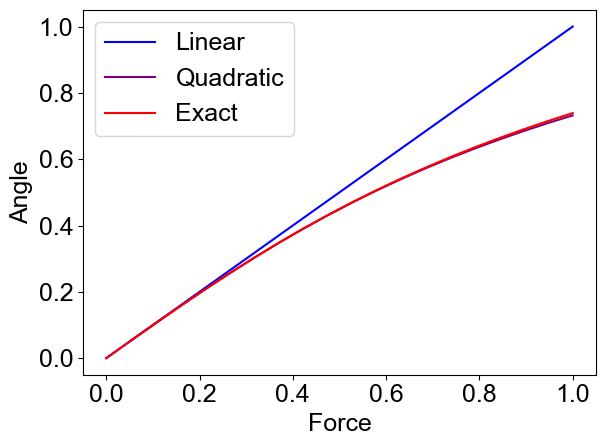

In [4]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.plot(F,phi_linear,label='Linear',color=[0,0,1])
plt.plot(F,phi_quadratic,label='Quadratic',color=[0.5,0,0.5])
plt.plot(F,phi_exact,label='Exact',color=[1,0,0])
plt.legend(loc=2)
plt.xlabel('Force')
plt.ylabel('Angle')
plt.tight_layout()
plt.savefig('images/L01E01.png')

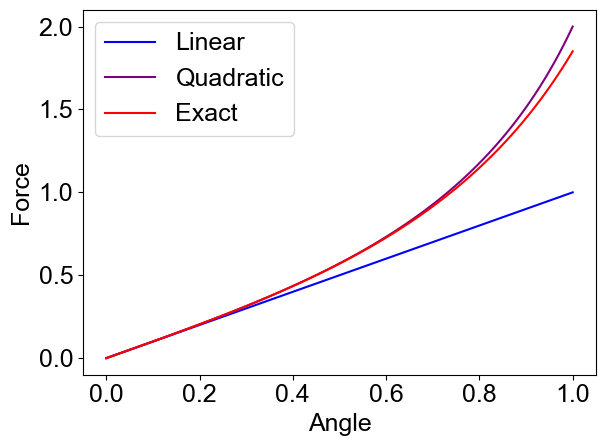

In [5]:
# plot the inverse way, deflection against force
c = 1 # [N*m]
l = 1 # [m]
n_pts = 100
angle = np.linspace(0,1,n_pts) # [N]

# Linear
F_linear = c*angle/l

# Quadratic 
F_quadratic = c*angle/l/(1-angle**2/2)

# Exact 
F_exact = c*angle/l/cos(angle)


font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.plot(angle,F_linear,label='Linear',color=[0,0,1])
plt.plot(angle,F_quadratic,label='Quadratic',color=[0.5,0,0.5])
plt.plot(angle,F_exact,label='Exact',color=[1,0,0])
plt.legend(loc=2)
plt.xlabel('Angle')
plt.ylabel('Force')
plt.tight_layout()
plt.savefig('images/L01E01.png')

*Example 2*: Deflection of a system of two linear springs 

<img src="images/example_unstable_2spring.png" alt="two springs in series with normal force in the middle" style="width: 400px;"/>

The sum of forces at the center is 

$$2c\, f \sin(\phi) = F$$ 

where $f$ is the extension of the springs. At this moment the equation is in terms of two variables, the angle and the extension of the spring, but they can be related to each other, just look at the triangle on the right of the picture. 

$$ \sin(\phi) = \frac{w}{l+f}$$

and

$$(l + f)^2 = l^2 + w^2$$ 

After some algebra one can arrive at 

$$v\left(1-\frac{1}{\sqrt{1+v^2}}\right)=\frac{F}{2cl}$$

with $v=w/l$ the only unknown. 

Thus, the problem now reads: Given a force $F$ calculate the deflection $v$. 

Clearly the equation is nonlinear in $v$. 

The Taylor series for the function $\frac{1}{\sqrt{1+v^2}}$ is 

$$\frac{1}{\sqrt{1+v^2}} = 1 - \frac{v^2}{2}+...$$

Plugging this into the original nonlinear equation leads to 

$$v^3=\frac{F}{cl}$$ 

This is actually a cubic equation but it only comes from the quadratic expansion of the function $1/\sqrt{1+v^2}$ so I will label it *quadratic* in the plot. The reason why we ended up with a cubic approximation instead of a quadratic approximation is that I only expanded part of the nonlinearity into its Taylor series. The full nonlinear function was actually $v/\sqrt{1+v^2}$ but I left the $v$ out because the expansion of $1/\sqrt{1+v^2}$ is more readily available. 

The main message is that the original problem was highly nonlinear, but by expressing the nonlinear functions in terms of the Taylor series we can get approximate the problem with polynomials up to a desired order of approximation, and solving the polynomial equation is much easier, at least for low degree polyonmials up to degree $3$. 

**Activity** 

In the code below, plot the approximate solution. 

Code that computes the exact solution numerically using Newton Raphson (NR) is also given. The NR algorithm is going to be introduced in a later video but you can see the code to get an idea of how it works, or come back to this notebook after watching the NR video! 


In [6]:
# Given some force get the deflection 
n_pts = 100
F = np.linspace(0,0.5,n_pts)
c = 1.0 # [N/m]
l = 1.0 # [m]

# Quadratic approximation
v_quadratic = (F/(c*l))**(1./3)

# Exact solution with Newton Raphson, careful because problem is actually singular as you move to the origin
# some remedy is needed to ensure convergence at the origin because the derivative of the residual approaches 
# zero! actually that's also why there is no 'linear' approximation for this example, note that we just went
# directly for the quadratic case 
v_exact = np.zeros((n_pts))
for i in range(1,n_pts):
    # initialize NR solver
    res = 1.0
    tol = 1e-6
    itermax=100
    iter=0
    # initial guess take previous solution
    if i>1:
        v_i = v_exact[i-1]
    else: 
        v_i=0.2
    while res>tol and iter<itermax:
        res = v_i*(1-1./sqrt(1+v_i**2))- F[i]/(2*c*l)
        dres = (1-1./sqrt(1+v_i**2)) + v_i**2/sqrt((1+v_i**2)**3)
        v_i -= res/dres
        iter+=1
    #print('Iterations for step %i: %i'%(i,iter))
    v_exact[i] = v_i

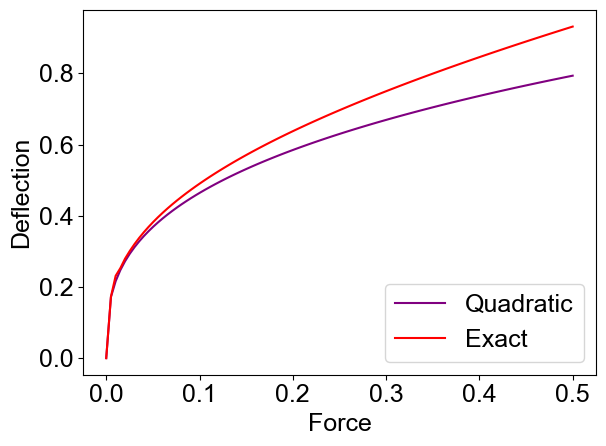

In [7]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.plot(F,v_quadratic,label='Quadratic',color=[0.5,0,0.5])
plt.plot(F,v_exact,label='Exact',color=[1,0,0])
plt.legend(loc=4)
plt.xlabel('Force')
plt.ylabel('Deflection')
plt.tight_layout()

In [8]:
# Alternatively, do simply the inverse, get the force for a given deflection, which in this case is
# a much better behaved problem and no need for NR, just evaluate directly

n_pts = 100
v = np.linspace(0,0.75,n_pts)
c = 1.0 # [N/m]
l = 1.0 # [m]

# Quadratic approximation
F_quadratic = c*l*v**3

# Exact solution 
F_exact = 2*c*l*v*(1-1./sqrt(1+v**2))

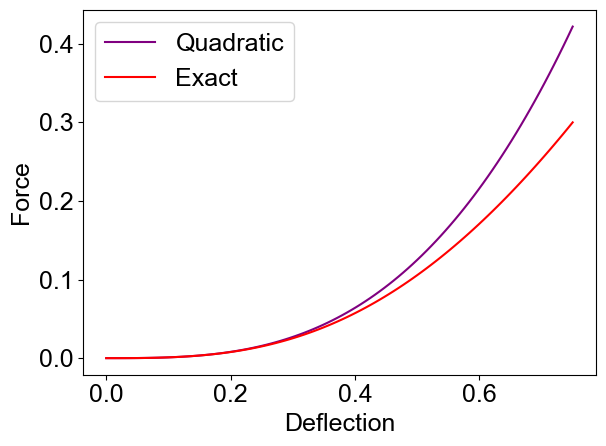

In [9]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.plot(v,F_quadratic,label='Quadratic',color=[0.5,0,0.5])
plt.plot(v,F_exact,label='Exact',color=[1,0,0])
plt.legend(loc=2)
plt.xlabel('Deflection')
plt.ylabel('Force')
plt.tight_layout()
plt.savefig('images/L01E02.png')

### Nonlinear strain 

#### Example 3 

Truss instability 

<img src="images/example_snap_thru_nonlinear_strain.png" alt="snap through problem" style="width: 600px;"/>

Force balance for this problem reduces to 

\begin{align}
\sigma \, a \sin(\theta) - F = 0 \tag{1}
\label{eq1}
\end{align}

Where $\sigma$ is the stress in the bar, and $\theta$ is the angle between the bar and the horizontal. The stress can be computed with 

$$\sigma=E\varepsilon$$ 

where $E$ is Young's modulus and $\varepsilon$ is the strain. You are probably familiar with the linear strain $\epsilon=(l-L)/L$. Nonlinear strains are indicated in the figure. The problem can be parameterized in terms of either the variable $x$ or the variable $l$. We will do it all in terms of $x$ in the end. Note that $X$ and $L$ denote the initial geometry and are known quantities. Similarly, the initial cross section area $A$ is also known. Finally, the force $F$ is given. We will assume that the area $a$ reduces with strain so that the volume of the bar is preserved. Also, with simple trigonometry we can get rid of the angle 

\begin{align}
\sigma \, \frac{AL}{l} \frac{x}{l} - F = 0 
\end{align}

And we can finally get rid of the variable $l$ and put everything in terms of $x$ 

\begin{align}
\sigma \, \frac{ALx}{x^2+D^2}  - F = 0 
\label{eq2}
\end{align}


Problem: Given $F$, compute the displacement $x$ of the bar. 

Consider the parameters 

* $E=1$ Pa
* $D=1$ m
* $L=1.2$ m
* $V=1$ m<sup>3
* $A=0.8333$ m<sup>2

**Activity** 

* Plot the different strains $\varepsilon$ as a function of $l$ 
* Substitute $\sigma=E\varepsilon$ in the eq. 1 using the different nonlinear strains 
* To avoid solving the actual problem, note that the problem is nonlinear in $x$ but linear in $F$, so plot $F$ as a function of $x$, you don't need to solve any set of equations! 


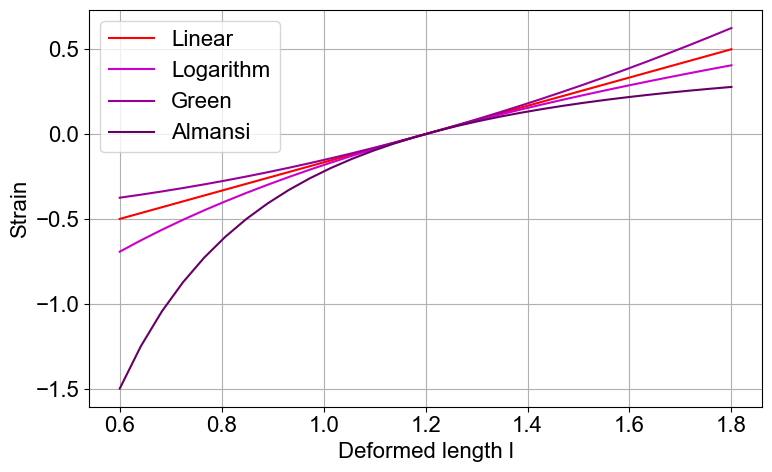

In [11]:
L = 1.2 # [m]

## just plotting the different strains as a function of the new length l 
font = {'family' : 'Arial',
        'size'   : 16}
matplotlib.rc('font', **font)
plt.figure(figsize=(8,5))
l_ls = np.linspace(0.5*L,1.5*L,30)
plt.plot(l_ls,(l_ls-L)/L,label='Linear',color=[1,0,0])
plt.plot(l_ls,np.log(l_ls/L),label='Logarithm',color=[0.8,0,0.8])
plt.plot(l_ls,(l_ls**2-L**2)/(2*L**2),label='Green',color=[0.6,0,0.6])
plt.plot(l_ls,(l_ls**2-L**2)/(2*l_ls**2),label='Almansi',color=[0.4,0,0.4])
plt.legend(loc=2)
plt.xlabel('Deformed length l')
plt.ylabel('Strain')
plt.grid()
plt.tight_layout()

In [12]:
# given x plot F which is easy, but in reality we would like to solve the opposite problem 
# the real application is, given some force, get the displacement. This will be done in the
# homework! 

E = 1 # Pa
D = 1 # m
L = 1.2 # m
V = 1 #m^3 

n_pts = 100
x = np.linspace(-1.0,1.0,n_pts)

l_exact = sqrt(D**2+x**2)
F_exact_lin = E*V*x/(l_exact**2)*(l_exact-L)/L
F_exact_ln = E*V*x*np.log(l_exact/L)/(l_exact**2)
F_exact_G = E*V*x*(l_exact**2-L**2)/(2*L**2*l_exact**2)
F_exact_alm = E*V*x/(l_exact**2)*(l_exact**2-L**2)/(2*l_exact**2)



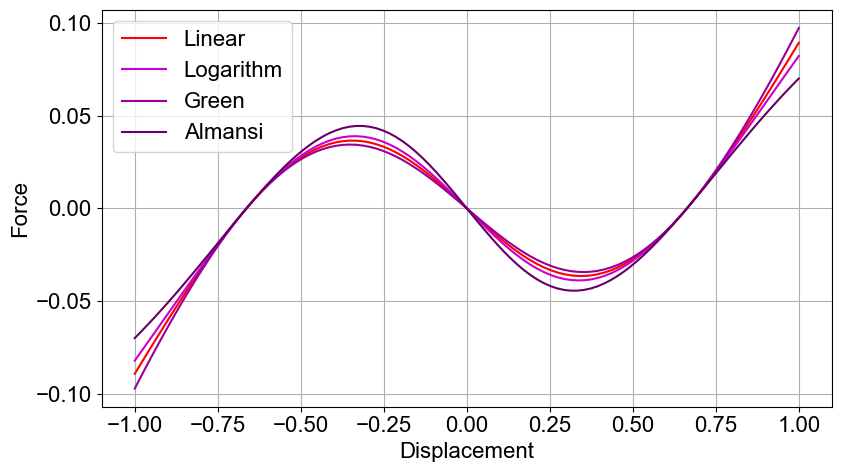

In [13]:
font = {'family' : 'Arial',
        'size'   : 16}
matplotlib.rc('font', **font)
plt.figure(figsize=(8.7,5))
plt.plot(x,F_exact_lin,label='Linear',color=[1,0,0])
plt.plot(x,F_exact_ln,label='Logarithm',color=[0.8,0,0.8])
plt.plot(x,F_exact_G,label='Green',color=[0.6,0,0.6])
plt.plot(x,F_exact_alm,label='Almansi',color=[0.4,0,0.4])
plt.legend(loc=2)
plt.xlabel('Displacement')
plt.ylabel('Force')
plt.grid()
plt.tight_layout()
plt.savefig('images/L01E03.png')


## Nonlinear material

### Hyperelasticity 

#### Example 

Uniaxial test of a neo-Hookean material 

<img src="images/example_neohook_uniaxial.png" alt="uniaxial test of neo hookean solid" style="width: 400px;"/>

As explained in the video, the neo-Hookeans solid has stress defined by 

$$\sigma = \frac{\mu}{J}(\mathbf{b}-\mathbf{I} ) + \frac{\lambda}{J}\log(J)\mathbf{I}$$ 

with $\mathbf{b}=\mathbf{F}\mathbf{F}^T$ and $\mathbf{I}$ the identity matrix. For uniaxial deformation assume that we know $\lambda_1$ and that we know $\sigma_{yy}=\sigma_{zz}=0$, then the problem reduces to two equations 

\begin{align}
\sigma_{xx} &= \frac{\mu}{J}(\lambda_1^2 - 1) + \frac{\lambda}{J}\log(J)\\
0 &= \frac{\mu}{J}(\lambda_2^2 - 1) + \frac{\lambda}{J}\log(J)
\end{align}

With $J=\lambda_1\lambda_2^2$. The unknowns are $\sigma_{xx}$ and $\lambda_2$, and the parameters $\mu$ and $\lambda$. Note, please don't confuse the parameter $\lambda$ with any of the stretches $\lambda_1, \lambda_2, \lambda_3$. The parameter $\lambda$ is similar to a modulus parameter. In fact, the parameters $\mu$ and $\lambda$ are called [Lame parameters](https://en.wikipedia.org/wiki/Lam%C3%A9_parameters)

The solution of the system of equations is done with Newton-Raphson in the code below 

In [14]:
# Parameters 
lam_NH = 10. # Pa
mu_NH = 1. # Pa 

# uniaxial deformation given by lam1 
n_pts = 100
lam1 = np.linspace(1,2,n_pts)
sigma11 = np.zeros((n_pts))
lam2 = np.ones(n_pts)

# solve with NR, first solve for lam2, then just evaluate for sigma11 
for i in range(1,n_pts):
    # initialize NR solver
    res = 1.0
    tol = 1e-6
    itermax=100
    iter=0
    lam2_i = lam2[i-1]
    while res>tol and iter<itermax:
        res = mu_NH*(lam2_i**2-1)/(lam1[i]*lam2_i**2)+lam_NH*np.log(lam1[i]*lam2_i**2)/(lam1[i]*lam2_i**2)
        dres = 2*mu_NH*lam2_i/(lam1[i]*lam2_i**2)- 2*mu_NH*(lam2_i**2-1)/(lam1[i]*lam2_i**3)\
                +2*lam_NH/(lam1[i]*lam2_i**3)-2*lam_NH*np.log(lam1[i]*lam2_i**2)/(lam1[i]*lam2_i**3)
        lam2_i -= res/dres
        iter+=1
    #print('Iterations for step %i: %i'%(i,iter))
    lam2[i] = lam2_i
    sigma11[i] = mu_NH*(lam1[i]**2-1)/(lam1[i]*lam2_i**2)+lam_NH*np.log(lam1[i]*lam2_i**2)/(lam1[i]*lam2_i**2)

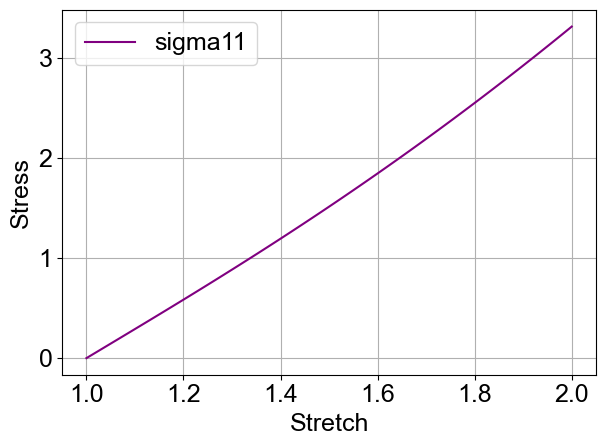

In [15]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.plot(lam1,sigma11,label='sigma11',color=[0.5,0,0.5])
plt.legend(loc=2)
plt.xlabel('Stretch')
plt.ylabel('Stress')
plt.grid()
plt.tight_layout()
plt.savefig('images/L01E04s.png')

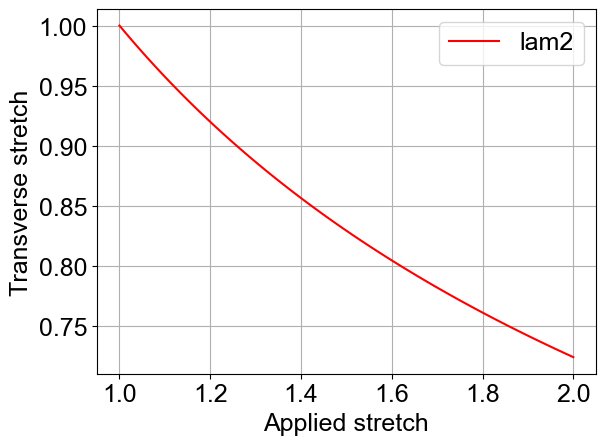

In [16]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.plot(lam1,lam2,label='lam2',color=[1,0,0])
plt.legend(loc=1)
plt.xlabel('Applied stretch')
plt.ylabel('Transverse stretch')
plt.grid()
plt.tight_layout()
plt.savefig('images/L01E04l2.png')

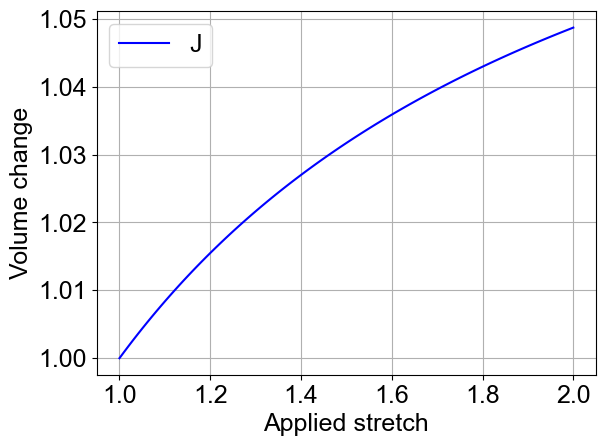

In [17]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
plt.plot(lam1,lam1*lam2*lam2,label='J',color=[0,0,1])
plt.legend(loc=2)
plt.xlabel('Applied stretch')
plt.ylabel('Volume change')
plt.grid()
plt.tight_layout()
plt.savefig('images/L01E04J.png')